# AOS 51, Spring 2018, Lab #4

# Pandas part 1 

For the past three weeks, we have learned the essentials of lists, arrays, loops, if statements, arithmetic, and statistics using core Python capabilties and the Numpy/Scipy packages. 

These skills provide a foundation to now launch into specialized packages designed for powerful, efficienct, and enjoyable data analysis. 

The first package we'll use is called [Pandas](https://pandas.pydata.org/). We'll analyze and plot climate data using Pandas for the next few weeks. 

Pandas is not only one of the most popular packages for 2D climate data analyses, but it is widely used in the business and technology sectors (like crunching all of your personal data and embarrassing posts at [Facebook](https://www.fastcompany.com/3030877/businesses-can-now-use-the-same-stats-language-as-universities-thanks-to-pandas)).

Let's begin!

---

Like numpy and scipy, we need to import Pandas. By convention, we'll rename Pandas as "pd". (Similar to how we named numpy as np.) 

In [33]:
import pandas as pd

# Pandas Series

There are two data structures in Pandas:

1. Series - 1D time series of climate data
2. DataFrame - 2D matrix of climate data

Today, we'll just work with Series.

### Creating a Series

You can generate a [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) in pandas by simply feeding the `pd.Series()` function a `list` of values: 

In [34]:
pd.Series([23.0, -15.6, 0.0, -.005])

0    23.000
1   -15.600
2     0.000
3    -0.005
dtype: float64

Since all values in this Series are float numbers, Pandas let's us know that the datatype ("dtype") is float64.

Note that Pandas has automatically created an **index** as the left-most column. This index is simply a range of integers corresponding to the number of elements in the Series (or you can think of this as the row index).

Of course, like everything in Python, Pandas index also begins with zero, not one.

Series can contain all numbers, all strings, or a mix:

In [4]:
pd.Series(['City', 'Los Angeles', 'Date', '2018-04-24', 'Soil Moisture', 5.25, 'units', 'mm'])

0             City
1      Los Angeles
2             Date
3       2018-04-24
4    Soil Moisture
5             5.25
6            units
7               mm
dtype: object

Since we have a mix of strings and a float here, the datatype is simply an "object".

---
** In-class exercise **

Create a Series storing the last 6 annual-mean temperatures over Las Vegas, NV (for the record, I am *not* a fan of this city):

| Year | Temp (F)|
|---|---|
|2012|71.2|
|2013|69.8|
|2014|72.0|
|2015|71.8|
|2016|71.6|
|2017|72.3|

---

### Modifying the Index of a Series

Sometimes, we don't want to have an index of integers. We can modify it by specifying what is `data` and what is an `index`: 

In [5]:
pd.Series(data=[23.0, -15.6, 0.0, -.005], index=['A', 'B', 'C', 'D'])

A    23.000
B   -15.600
C     0.000
D    -0.005
dtype: float64

In [6]:
pd.Series(data=[23.0, -15.6, 0.0, -.005], index=[5, 10, 15, 20])

5     23.000
10   -15.600
15     0.000
20    -0.005
dtype: float64

---
** In-class exercise **

Adjust the Series you created above so that the index represents the range of years corresponding to the Las Vegas temperatures.

---

### Creating date ranges and a DateTimeIndex 

Manually entering dates into our Series Index is tediuous. 

Usefully, we can create a [pd.date_range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) to set some dates as our index:

In [7]:
# Generate a DatetimeIndex of 4 days: April 1 - April 4, 2018
dates = pd.date_range(start='2018-04-01', end='2018-04-04', freq='D')
print(dates)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04'], dtype='datetime64[ns]', freq='D')


In [8]:
# Then set "dates" as the index
pd.Series(data=[23.0, -15.6, 0.0, -.005], index=dates)

2018-04-01    23.000
2018-04-02   -15.600
2018-04-03     0.000
2018-04-04    -0.005
Freq: D, dtype: float64

#### More on pd.date_range

`pd.date_range` is very powerful and flexible. It can create date ranges with [frequency intervals](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) ranging from nanoseconds to years.

Most common to climate data would be date ranges of hours, days, months, and years:

In [68]:
# Hourly date range, freq='H'
pd.date_range(start='2018-04-01', end='2018-04-02', freq='H')

DatetimeIndex(['2018-04-01 00:00:00', '2018-04-01 01:00:00',

               '2018-04-01 02:00:00', '2018-04-01 03:00:00',

               '2018-04-01 04:00:00', '2018-04-01 05:00:00',

               '2018-04-01 06:00:00', '2018-04-01 07:00:00',

               '2018-04-01 08:00:00', '2018-04-01 09:00:00',

               '2018-04-01 10:00:00', '2018-04-01 11:00:00',

               '2018-04-01 12:00:00', '2018-04-01 13:00:00',

               '2018-04-01 14:00:00', '2018-04-01 15:00:00',

               '2018-04-01 16:00:00', '2018-04-01 17:00:00',

               '2018-04-01 18:00:00', '2018-04-01 19:00:00',

               '2018-04-01 20:00:00', '2018-04-01 21:00:00',

               '2018-04-01 22:00:00', '2018-04-01 23:00:00',

               '2018-04-02 00:00:00'],

              dtype='datetime64[ns]', freq='H')

In [10]:
# Daily date range, freq='D'
pd.date_range(start='2018-04-01', end='2018-04-07', freq='D')

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Monthly date range, dates at the *end* of each month, freq='M' 
pd.date_range(start='2018-04', end='2018-08', freq='M')

DatetimeIndex(['2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31'], dtype='datetime64[ns]', freq='M')

In [12]:
# Monthly date range, dates at the *beginning* of each month, freq='MS' (month start)
pd.date_range(start='2018-04', end='2018-08', freq='MS')

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [13]:
# Annual date range, dates at the *end* of each year, freq='A'
pd.date_range(start='2012', end='2018', freq='A')

DatetimeIndex(['2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

Note how this range does not include 2018

In [14]:
# Annual date range, dates at the *beginning* of each year, freq='AS' (annual start)
pd.date_range(start='2012', end='2018', freq='AS')

DatetimeIndex(['2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

Note how this range now does include 2018

---
** In-class exercise **

1. Create an hourly date range containing all the hours of today's date.

   Note: this range will also include midnight of tomorrow
2. Create a daily range containing days of the past week, including today. 
3. Create a monthly date range (start of the month) containing the last 12 months, including this month. 
4. Create an annual date range (start of the year) containing years from when you were born through 2018.
---

### Slicing data in a Series

We can slice data in a Series two ways:

   1. By the data point's position in the Series
   2. By the data points' corresponding Index Labels
   
Let's give a name to the Series we created above that has dates as an index:

In [16]:
s = pd.Series(data=[23.0, -15.6, 0.0, -.005], index=dates)
print(s)

2018-04-01    23.000
2018-04-02   -15.600
2018-04-03     0.000
2018-04-04    -0.005
Freq: D, dtype: float64


** 1. Slicing by position **

We can slice by position exactly how we do for lists and 1D arrays:

In [17]:
# First element (zeroth index)
s[0]

23.0

In [18]:
# 4th element (3rd index)
s[3]

-0.0050000000000000001

In [19]:
# First 2 elements
s[0:2]

2018-04-01    23.0
2018-04-02   -15.6
Freq: D, dtype: float64

In [20]:
# Last 2 elements
s[-2:]

2018-04-03    0.000
2018-04-04   -0.005
Freq: D, dtype: float64

** 2. Slicing by Index Labels **

Since the Series has an Index - in this case a range of dates - we can extract items based on the date labels.

In [21]:
# Element at April 1, 2018
s['2018-04-01']

23.0

In [35]:
# Elements from April 2 - 4, 2018 (a range of dates)
s['2018-04-02':'2018-04-04']

2018-04-02   -15.600
2018-04-03     0.000
2018-04-04    -0.005
Freq: D, dtype: float64

In [37]:
# Elements at 2018-04-02 and 2018-04-04 (a list of dates)
s[['2018-04-02', '2018-04-04']]

2018-04-02   NaN
2018-04-04   NaN
dtype: float64

NaNs?! What happened here?

Pandas has a quirk when you slice of a list of dates. It can't convert from strings to Timestamps on the fly, so we need to do the conversion ourselves using Pandas [Timestamp](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html).

In [38]:
# Elements at 2018-04-02 and 2018-04-04 (a list of dates)
s[[pd.Timestamp('2018-04-02'),pd.Timestamp('2018-04-04')]]

2018-04-02   -15.600
2018-04-04    -0.005
dtype: float64

---
** In-class exercise **

California experienced an epic drought from 2012-2017. One way to measure drought is the [Palmer Drought Severity Index](https://climatedataguide.ucar.edu/climate-data/palmer-drought-severity-index-pdsi), which is an aggregate measure of low precipitation and dry soils. PDSI ranges from -10 (most drought-y) to 10 (no drought). 

Here is the annual-mean PDSI data from 2012-2017:

| Date | PDSI |
|---|---|
|2012| -1.59|
|2013| -2.84|
|2014| -5.75|
|2015| -4.79|
|2016| -1.37|
|2017| -0.08|

1. Create a `pd.date_range` called "years" that range from 2012-2017.
2. Create a Series called "PDSI" containing the PDSI data in table above with "years" as the Index. 
3. Use two different slicing commands to extract PDSI values in 2014.
---

# Math and Stats on Series

Similar to Numpy arrays, we can perform the standard arithmetic (+, -, *, /) and statistics (sum, min, max, mean, median, standard deviation) on Pandas Series:

In [91]:
s + 5.0

2018-04-01    28.000

2018-04-02   -10.600

2018-04-03     5.000

2018-04-04     4.995

Freq: D, dtype: float64

In [92]:
s - 100.5

2018-04-01    -77.500

2018-04-02   -116.100

2018-04-03   -100.500

2018-04-04   -100.505

Freq: D, dtype: float64

In [93]:
s * 1.5

2018-04-01    34.5000

2018-04-02   -23.4000

2018-04-03     0.0000

2018-04-04    -0.0075

Freq: D, dtype: float64

In [94]:
s / 10

2018-04-01    2.3000

2018-04-02   -1.5600

2018-04-03    0.0000

2018-04-04   -0.0005

Freq: D, dtype: float64

In [95]:
s.sum()

7.3950000000000005

In [96]:
s.mean()

1.8487500000000001

In [99]:
s.min()

-15.6

In [100]:
s.max()

23.0

In [101]:
s.median()

-0.0025

In [102]:
s.std()

15.902709609266802

---
**In-class exercise **

Using the `PDSI` series from the previous exercise, compute the mean and minimum value during 2012-2017.

Since Pandas is built on top of Numpy, we can use the functions `argmax` and `argmin` on Series to locate indices corresponding to the max/min values. For example:

`minimum_index = pd.Series([1, 5, 10, 25]).argmin()`
   
Using `argmin` and `argmax`, what years did the min and max PDSI values occur?

---

# Resampling date ranges 

One of the best functions of Pandas is [resample](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html), which converts the data in the Series with dates as an Index from one frequency to another.

The most common resampling for climate analysis is coverting from one frequency (e.g. daily) to a new, lower frequency (e.g. monthly) and then computing some statistics over data binned in the new lower frequency. 

Let's demonstrate with monthly PDSI values for the years 2012 - 2014:

In [152]:
dates = pd.date_range(start='2012-01', end='2014-12', freq='MS')
PDSI_monthly_2012_2014 = pd.Series(data=[-2.26, -3.17, -2.29, -1.72, -1.95, -1.85, -1.74, -1.58, -1.89, -1.98,
                              0.24, 1.08, -0.8, -1.67, -2.45, -2.84, -2.98, -3.28, -3.52, -3.24, -2.6,
                              -2.93, -3.41, -4.38, -5.89, -5.88, -5.58, -5.53, -6.04, -6.75, -7.0,
                              -6.34, -5.52, -5.28, -5.21, -3.96], index=dates)
PDSI_monthly_2012_2014

2012-01-01   -2.26

2012-02-01   -3.17

2012-03-01   -2.29

2012-04-01   -1.72

2012-05-01   -1.95

2012-06-01   -1.85

2012-07-01   -1.74

2012-08-01   -1.58

2012-09-01   -1.89

2012-10-01   -1.98

2012-11-01    0.24

2012-12-01    1.08

2013-01-01   -0.80

2013-02-01   -1.67

2013-03-01   -2.45

2013-04-01   -2.84

2013-05-01   -2.98

2013-06-01   -3.28

2013-07-01   -3.52

2013-08-01   -3.24

2013-09-01   -2.60

2013-10-01   -2.93

2013-11-01   -3.41

2013-12-01   -4.38

2014-01-01   -5.89

2014-02-01   -5.88

2014-03-01   -5.58

2014-04-01   -5.53

2014-05-01   -6.04

2014-06-01   -6.75

2014-07-01   -7.00

2014-08-01   -6.34

2014-09-01   -5.52

2014-10-01   -5.28

2014-11-01   -5.21

2014-12-01   -3.96

Freq: MS, dtype: float64

The general syntax for resampling and computing statistics over the new frequency is:

{name_of_Series}.resample({new frequency}).{statistic}

where:
   * name of Series = the name of the Series you want to resample
   * new frequency = new and lower frequency type (same as we used before, e.g. 'MS', 'AS') 
   * statistic = mean(), min(), max(), sum(), etc.

In [153]:
# Resampling monthly PDSI to annual and computing the mean
PDSI_annual_2012_2014 = PDSI_monthly_2012_2014.resample('AS').mean()
PDSI_annual_2012_2014

2012-01-01   -1.592500

2013-01-01   -2.841667

2014-01-01   -5.748333

Freq: AS-JAN, dtype: float64

Let's confirm that these annual-means are the same as contained in the `PDSI` Series.

In [154]:
PDSI['2012-01-01':'2014-01-1']

2012-01-01   -1.59

2013-01-01   -2.84

2014-01-01   -5.75

Freq: AS-JAN, dtype: float64

**Yep**

In [155]:
# Resampling monthly PDSI to annual and computing the minimum per year 
PDSI_2012_2014_annual_min = PDSI_monthly_2012_2014.resample('AS').min()
PDSI_2012_2014_annual_min

2012-01-01   -3.17

2013-01-01   -4.38

2014-01-01   -7.00

Freq: AS-JAN, dtype: float64

In [156]:
# Resampling monthly PDSI to annual and computing the maximum per year 
PDSI_2012_2014_annual_max = PDSI_monthly_2012_2014.resample('AS').max()
PDSI_2012_2014_annual_max

2012-01-01    1.08

2013-01-01   -0.80

2014-01-01   -3.96

Freq: AS-JAN, dtype: float64

---
** In-class exercise **

Let's have a look at the 2015-2017 monthly PDSI data for California:

In [133]:
dates_2015_2017 = pd.date_range(start='2015-01', end='2017-12', freq='MS')
PDSI_monthly_2015_2017 = pd.Series(data=[-4.83, -4.84, -5.67, -5.52, -5.10, -5.14, -4.86, -4.75, -4.48, -4.48, -4.30,
                         -3.56, -2.29, -2.98, -2.07, -2.08, -1.88, -1.88, -2.3, -2.55, -2.69, 1.58, 1.26,
                         1.4, 3.56, 4.66, -0.48, 0.47, -0.24, -0.28, -0.78, -1.02, -1.02, -1.61, -1.48, -2.69],
                        index=dates) 

1. Resample this data and compute the annual-means for 2015, 2016, and 2017.
2. Resample this data and compute the annual-minimums for 2015, 2016, and 2017. 
---

# Plotting Series

At long last, we are able to start visualizing our analyzed climate data. 

We'll learn many plotting types and techniques, and to start, we'll create simple plots of Pandas Series.

The basic syntax for [plotting a Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) is:

{name of Series}.plot(kind={plot type}, color={color of lines/bars}, title={plot title}) 

where:

* name of series = name of Series to be plotted
* kind = type of plot: 'line', 'bar', 'hist'
* color = color of lines/bars: 'red', 'blue', 'green', and so many more - [check out the full list of named colors](https://matplotlib.org/examples/color/named_colors.html)
* title = always give your plot a title!

Let's create a line plot of the annual-mean 2012-2017 PDSI values using the `PDSI` Series.

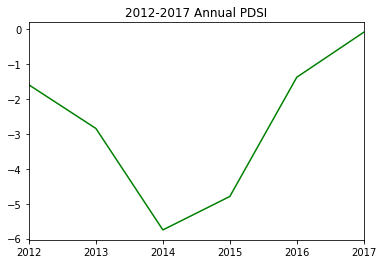

In [148]:
PDSI.plot(kind='line', color='green', title='2012-2017 Annual PDSI')

Let's create a bar chart of monthly 2012-2014 PDSI values using the `PDSI_monthly_2012_2014` Series.

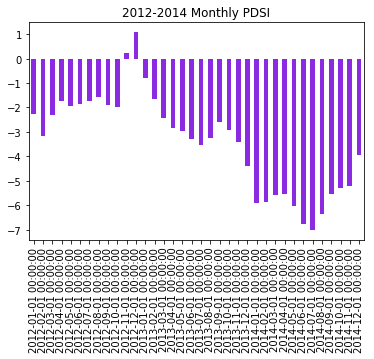

In [157]:
PDSI_monthly_2012_2014.plot(kind='bar', color='blueviolet', title='2012-2014 Monthly PDSI')

---
** In-class exercise **

Plot 2015-2017 monthly PDSI as a line chart. Give the line a color you love and a title that makes sense. 

Looking at the plot, are we entering another drought? Why or why not?

---